In [21]:
import pandas as pd
import shap
from shap import save_html
import json
import pickle
import numpy as np

from transformers import RobertaTokenizer

In [49]:
def clean_shap_values_feature_names(shap_values):
    shap_feature_names = list(shap_values.feature_names)
    shap_data = list(shap_values.data)
    for i in range(len(shap_feature_names)):
        shap_feature_names[i] = [token.replace("Ġ", "") for token in shap_feature_names[i]]
        shap_data[i] = [token.replace("Ġ", "") for token in shap_data[i]]
    shap_values.feature_names = shap_feature_names
    shap_values.data = shap_data

emotions_list = ['anger','fear','joy','sadness', 'surprise', 'none']

#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = RobertaTokenizer.from_pretrained("roberta-base", max_len=512)

# Test Dataset
data_json = None
with open("../data/eng_a_parsed_test.json", 'r') as file:
    data_json = json.load(file)

test117_data = pd.DataFrame(data_json)

# Training Dataset
with open("../data/eng_a_parsed.json", 'r') as file:
    data_json = json.load(file)

train_data = pd.DataFrame(data_json)

# Shape Values Mean
shap_values_mean = pickle.load(open("shap_values/shap_mean_values.pkl", "rb"))
shap_values_mean.output_names=emotions_list
clean_shap_values_feature_names(shap_values_mean)

# Shap Values Max
shap_values_max = pickle.load(open("shap_values/shap_max_values.pkl", "rb"))
shap_values_max.output_names=emotions_list
clean_shap_values_feature_names(shap_values_max)

# Shape TEST Values Mean
shap_values_mean_test = pickle.load(open("shap_values/shap_mean_values_test.pkl", "rb"))
shap_values_mean_test.output_names=emotions_list
clean_shap_values_feature_names(shap_values_mean_test)

# Shap TEST Values Max
shap_values_max_test = pickle.load(open("shap_values/shap_max_values_test.pkl", "rb"))
shap_values_max_test.output_names=emotions_list
clean_shap_values_feature_names(shap_values_max_test)

In [50]:
def get_emotions_count_dict(data_set):
    # How often an emotion combination occurs
    emotion_counts = data_set['emotions'].value_counts()

    emotion_accumulated = {key: 0 for key in emotions_list}

    for emotion_list, count in emotion_counts.items():
        
        for emotion in emotion_list:
            if emotion in emotions_list:
                emotion_accumulated[emotion] += count

    return emotion_accumulated

mean      Emotion: anger      Occ: 333


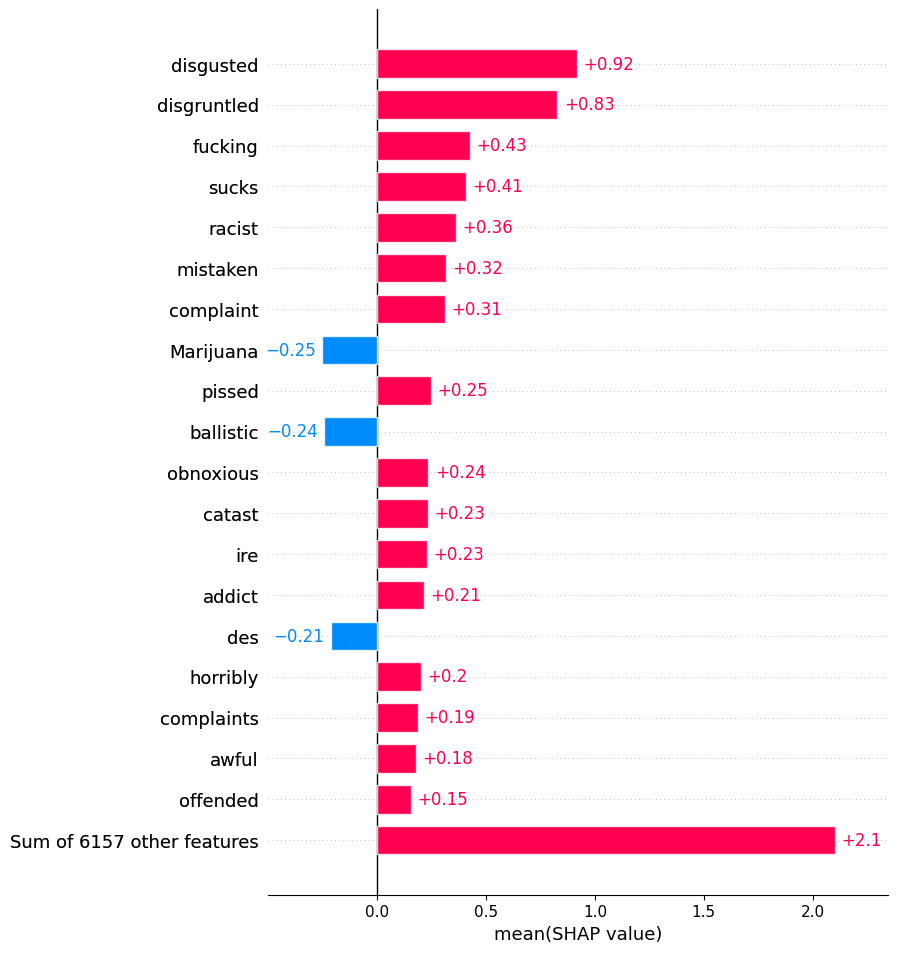

mean      Emotion: fear      Occ: 1611


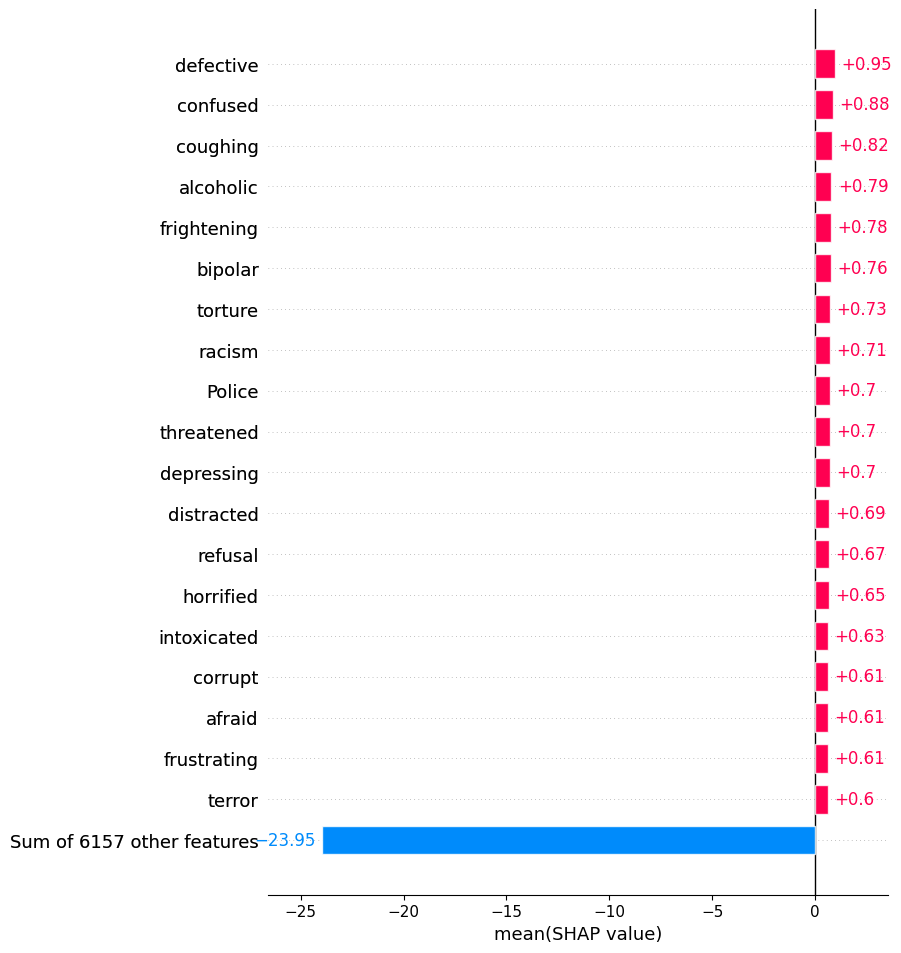

mean      Emotion: joy      Occ: 674


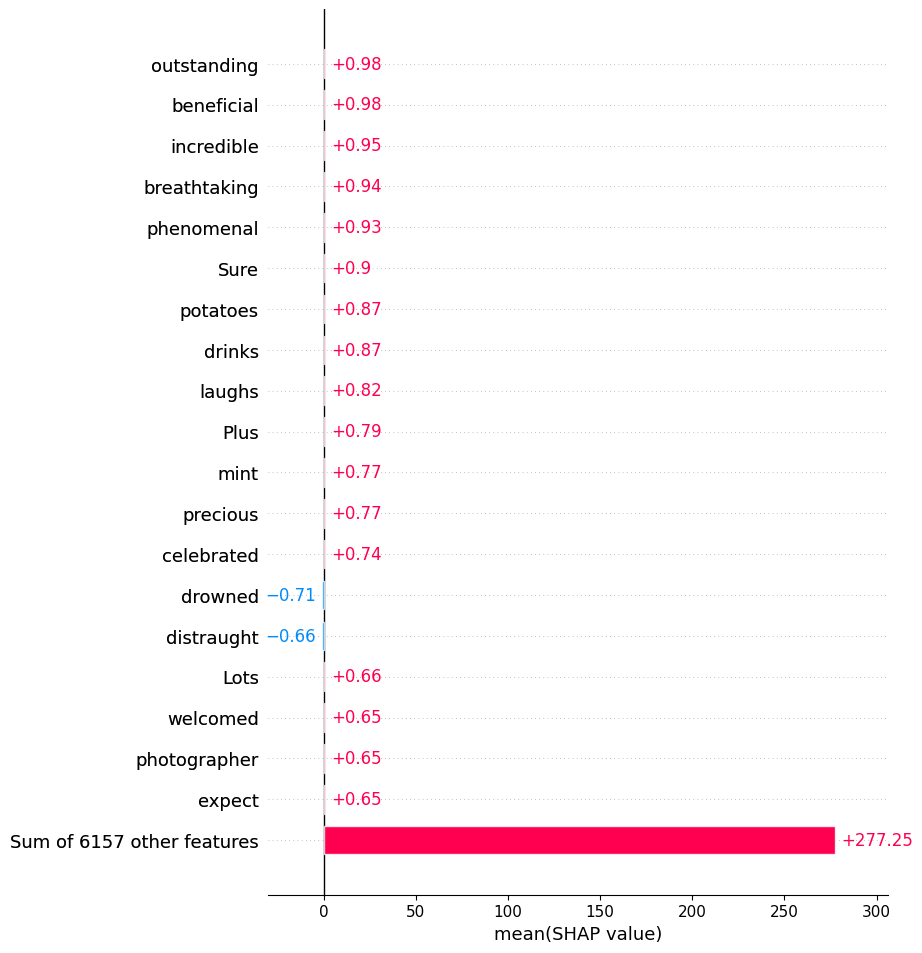

mean      Emotion: sadness      Occ: 878


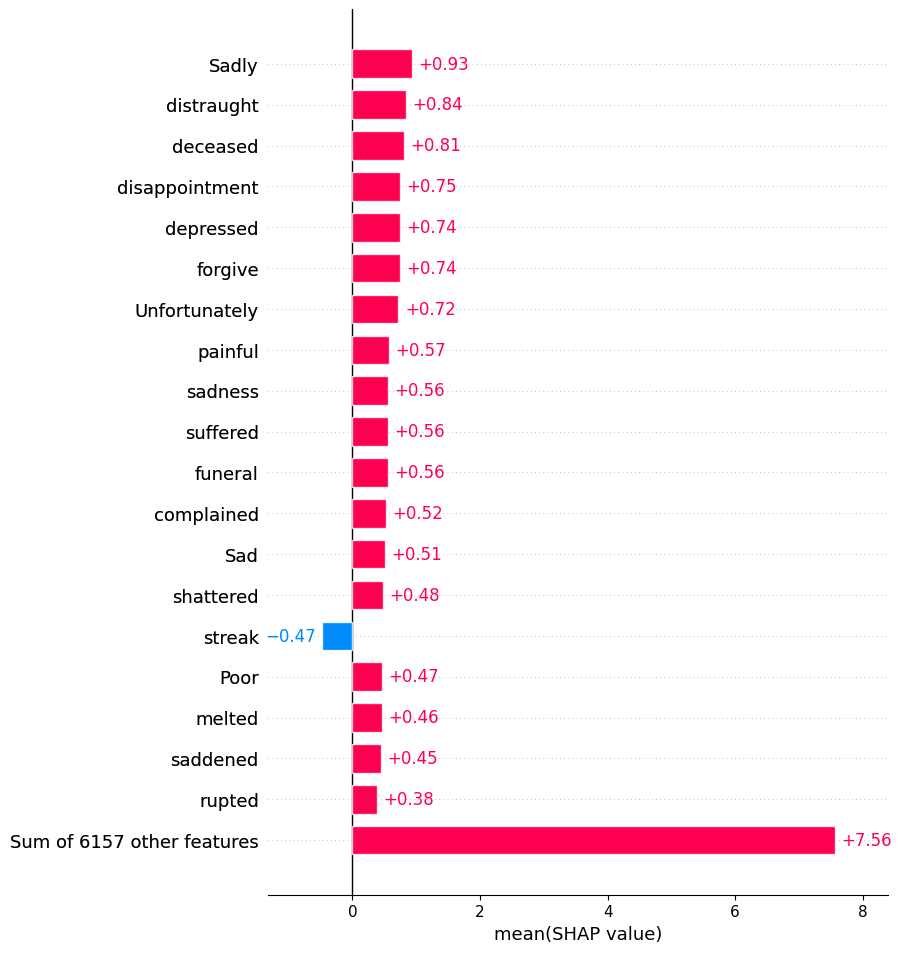

mean      Emotion: surprise      Occ: 839


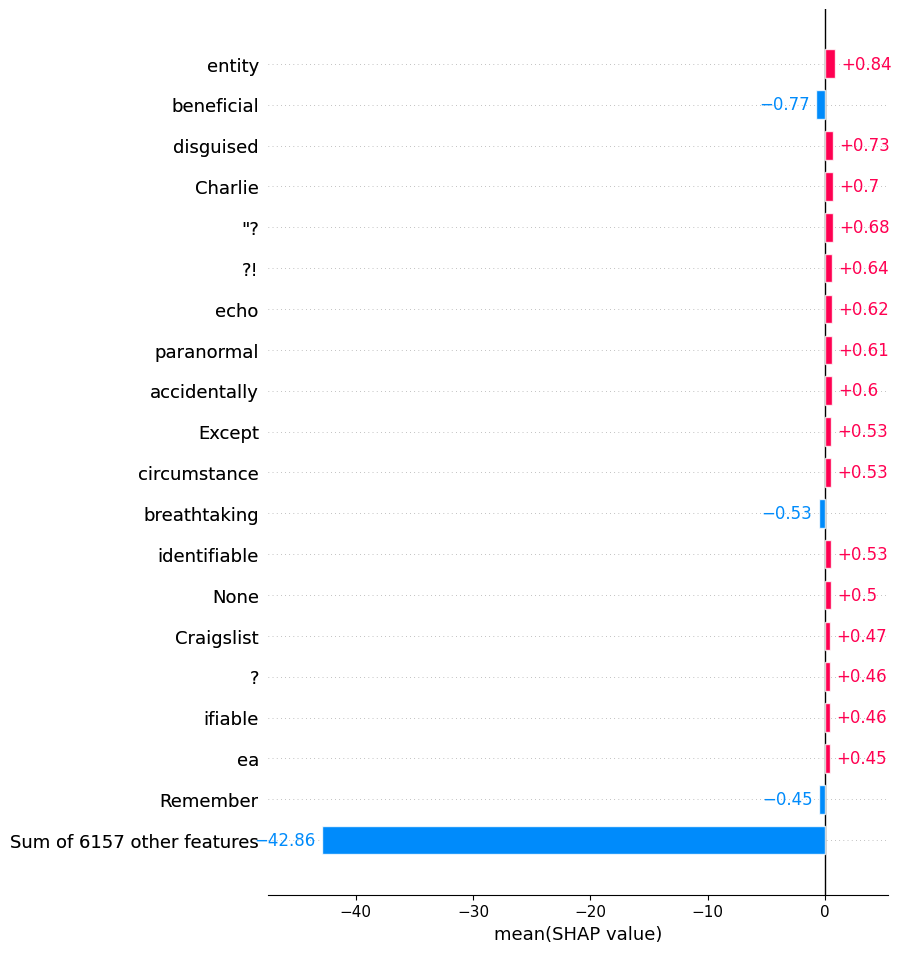

mean      Emotion: none      Occ: 239


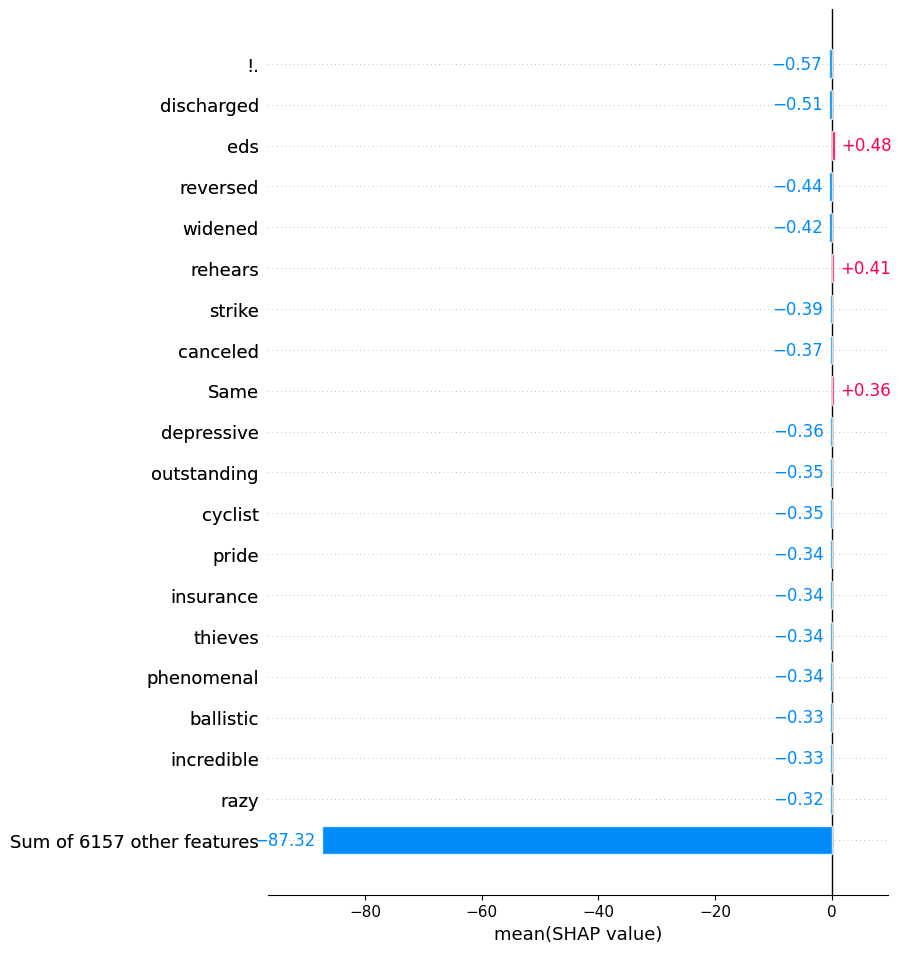

max      Emotion: anger      Occ: 333


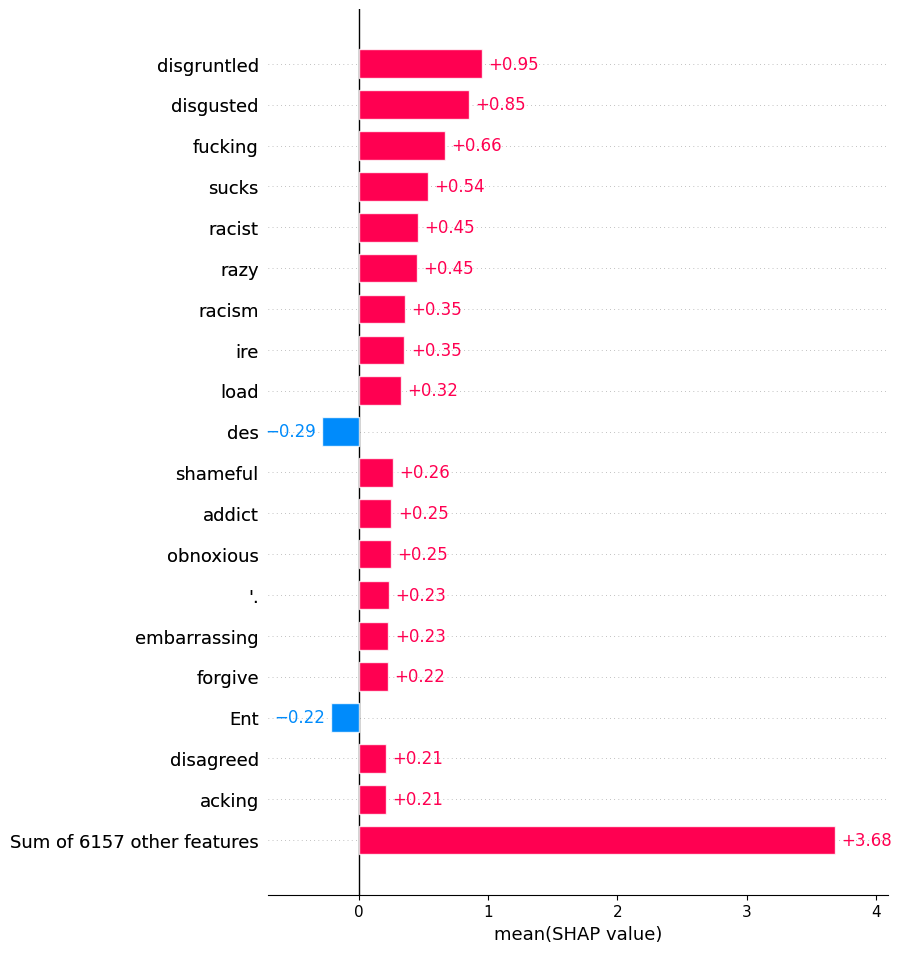

max      Emotion: fear      Occ: 1611


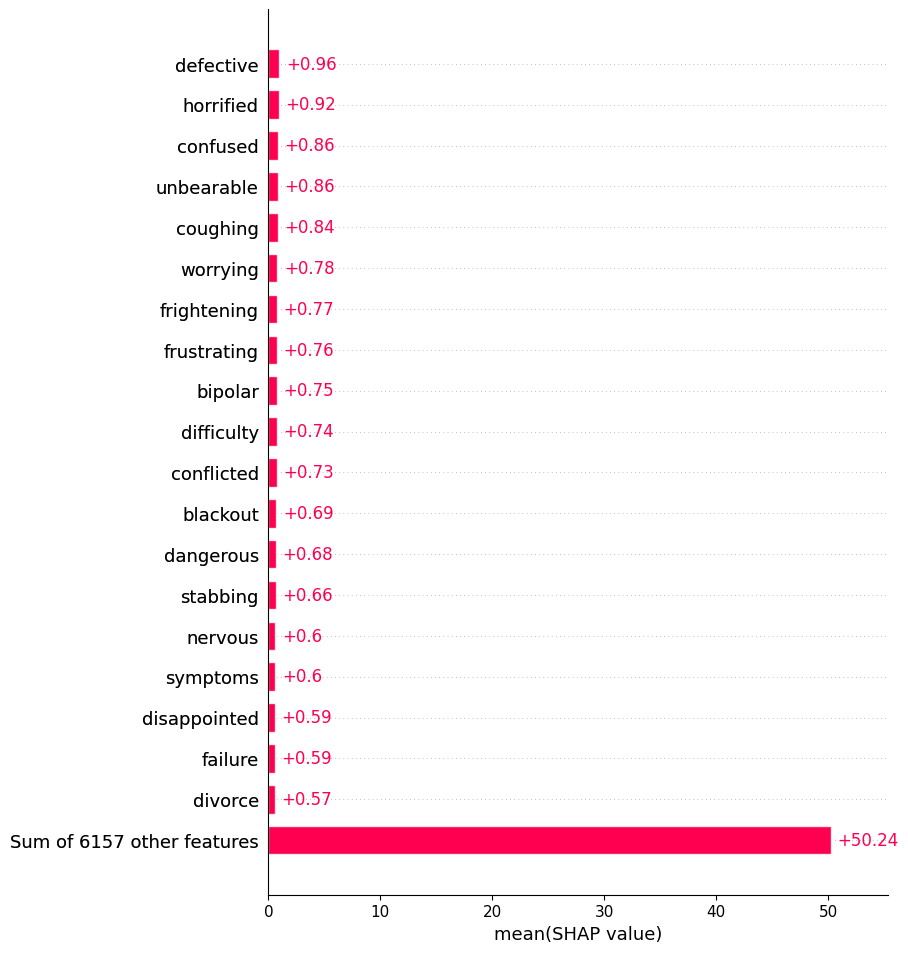

max      Emotion: joy      Occ: 674


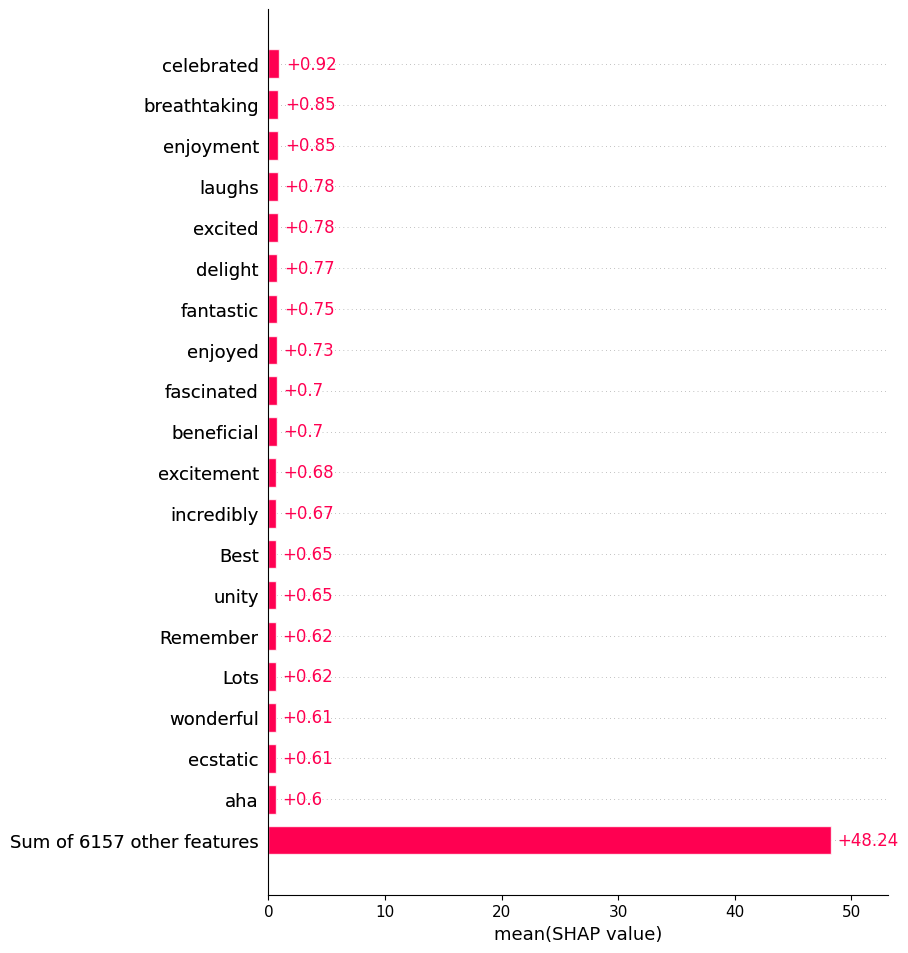

max      Emotion: sadness      Occ: 878


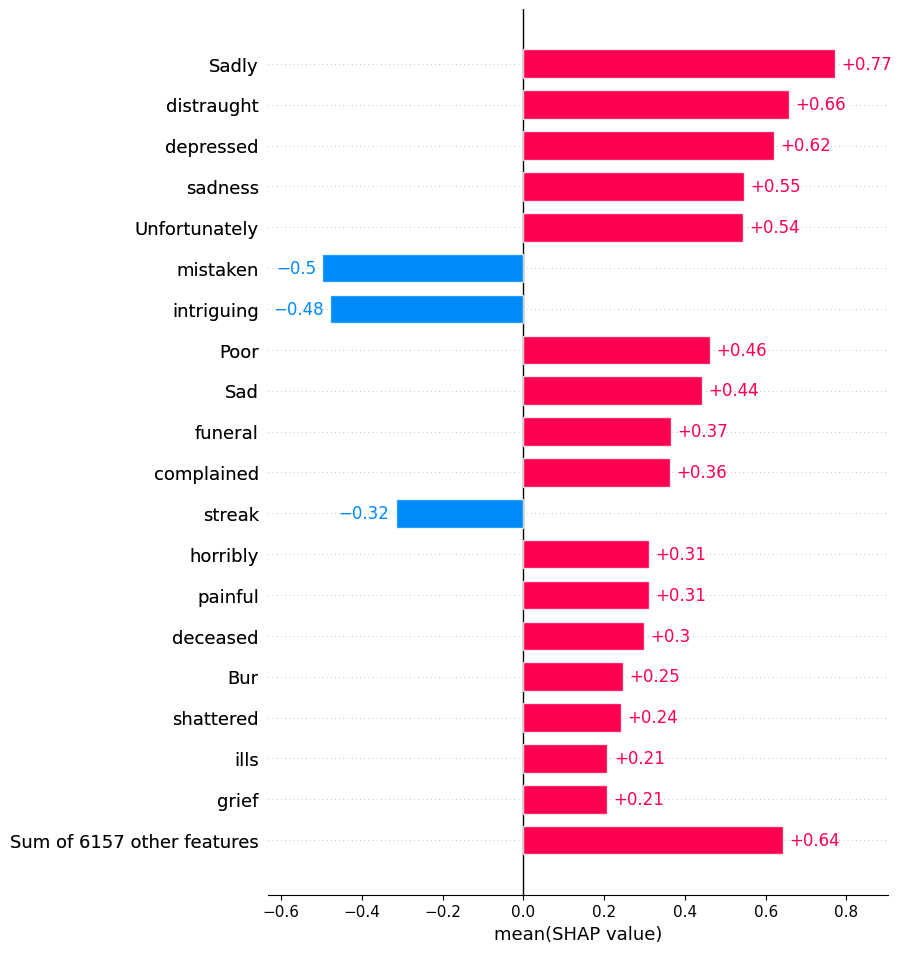

max      Emotion: surprise      Occ: 839


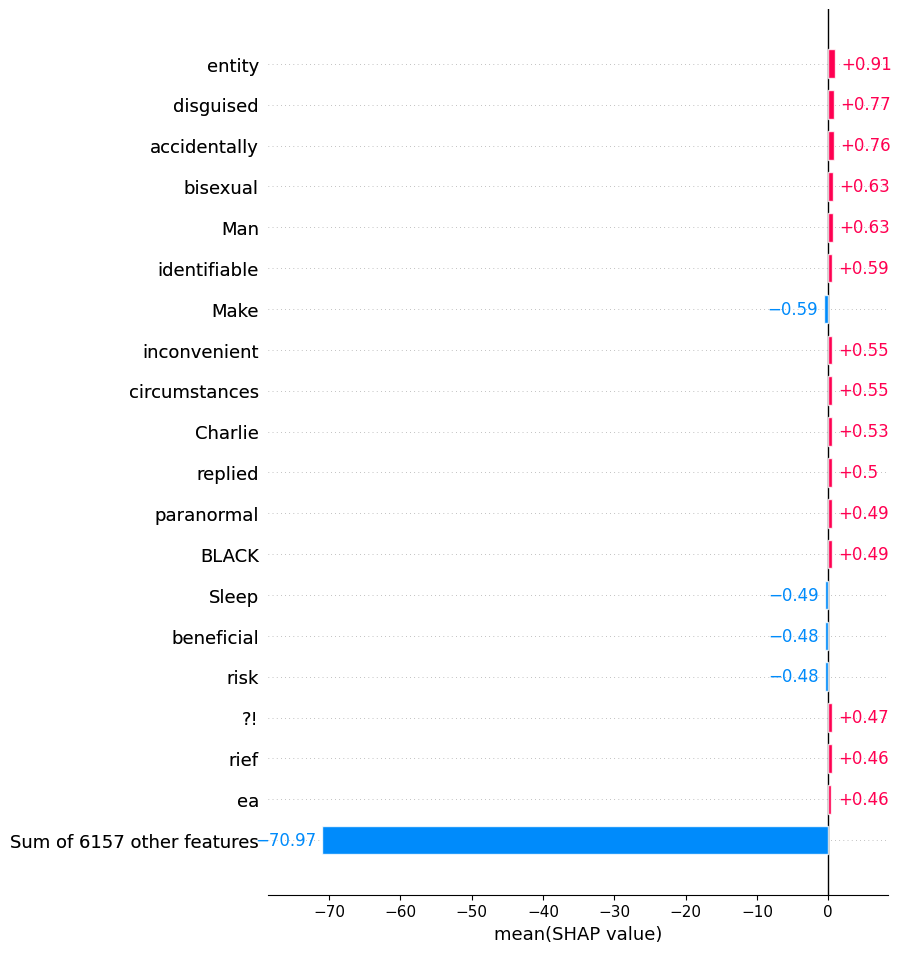

max      Emotion: none      Occ: 239


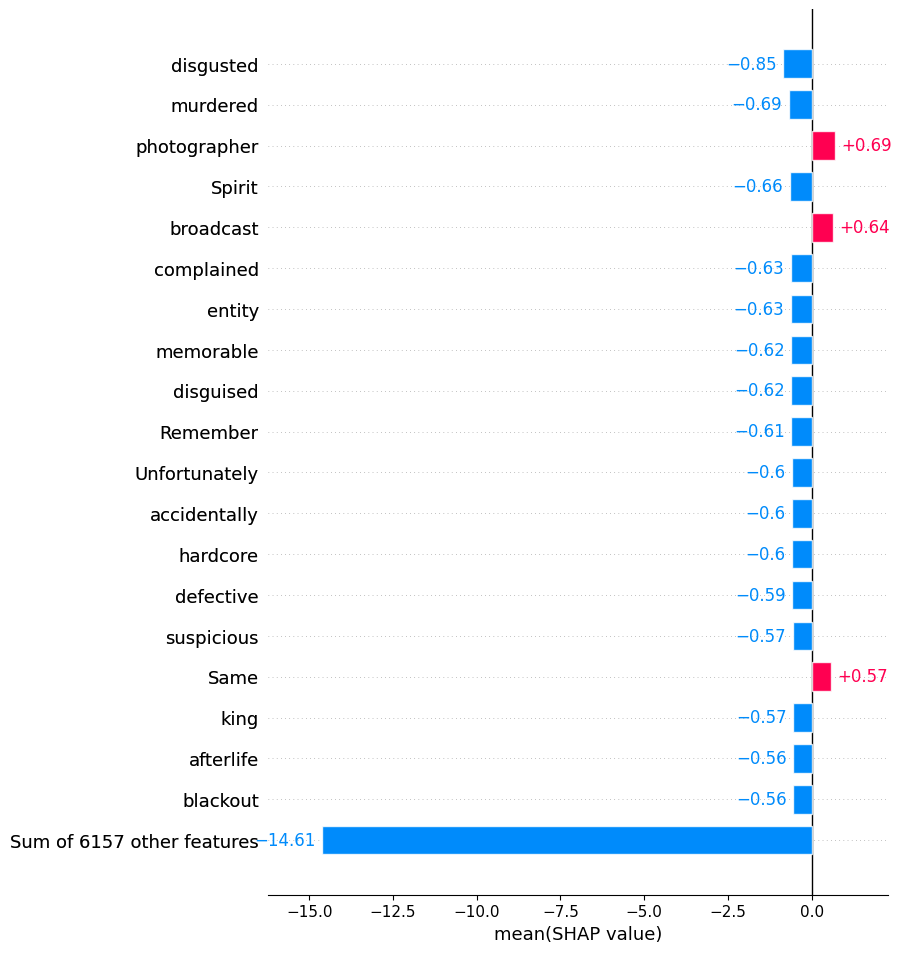

mean-test      Emotion: anger      Occ: 16


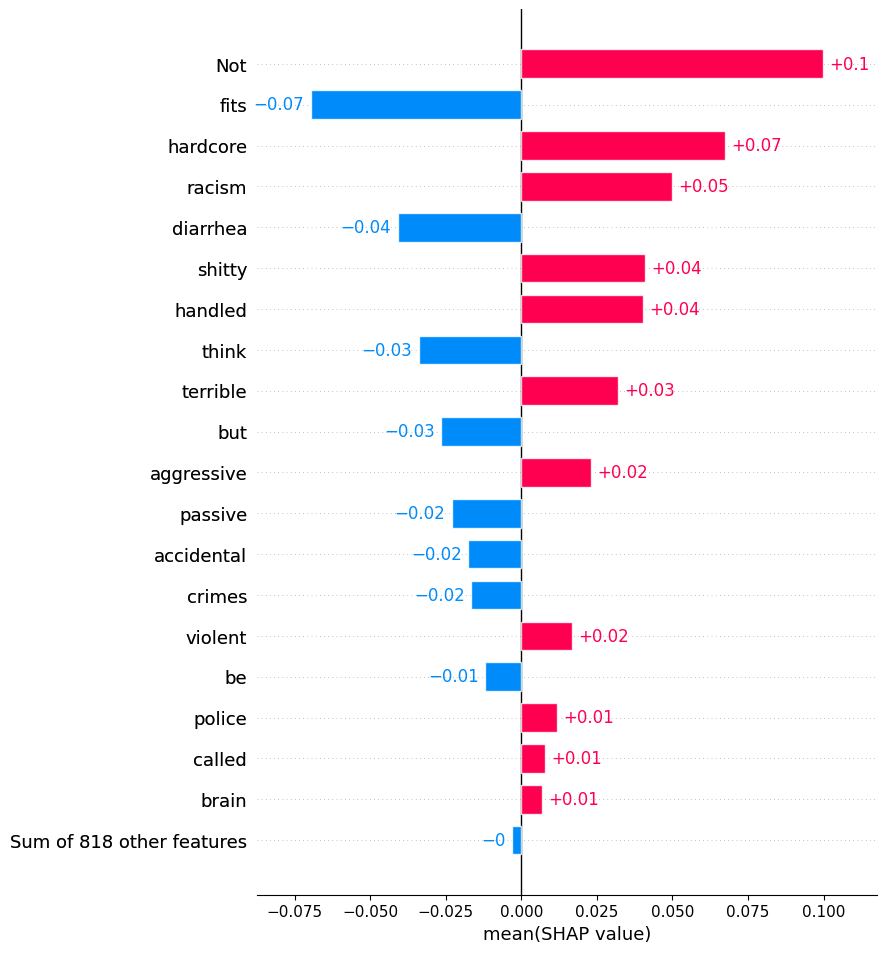

mean-test      Emotion: fear      Occ: 63


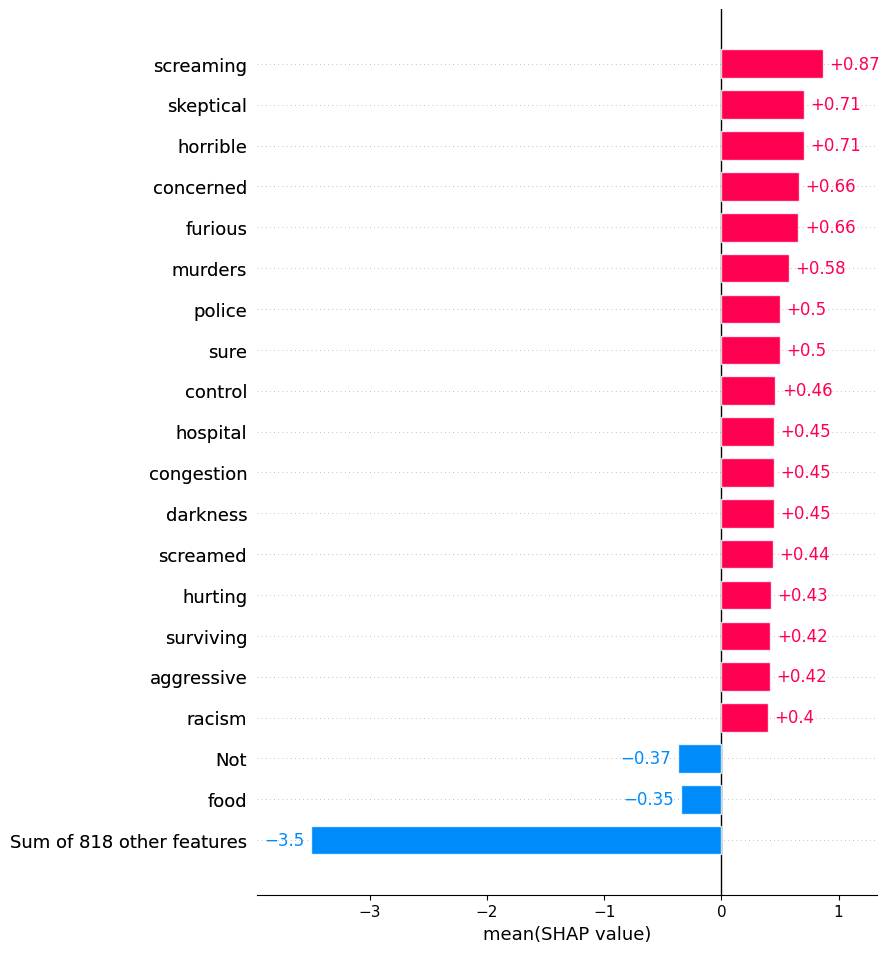

mean-test      Emotion: joy      Occ: 31


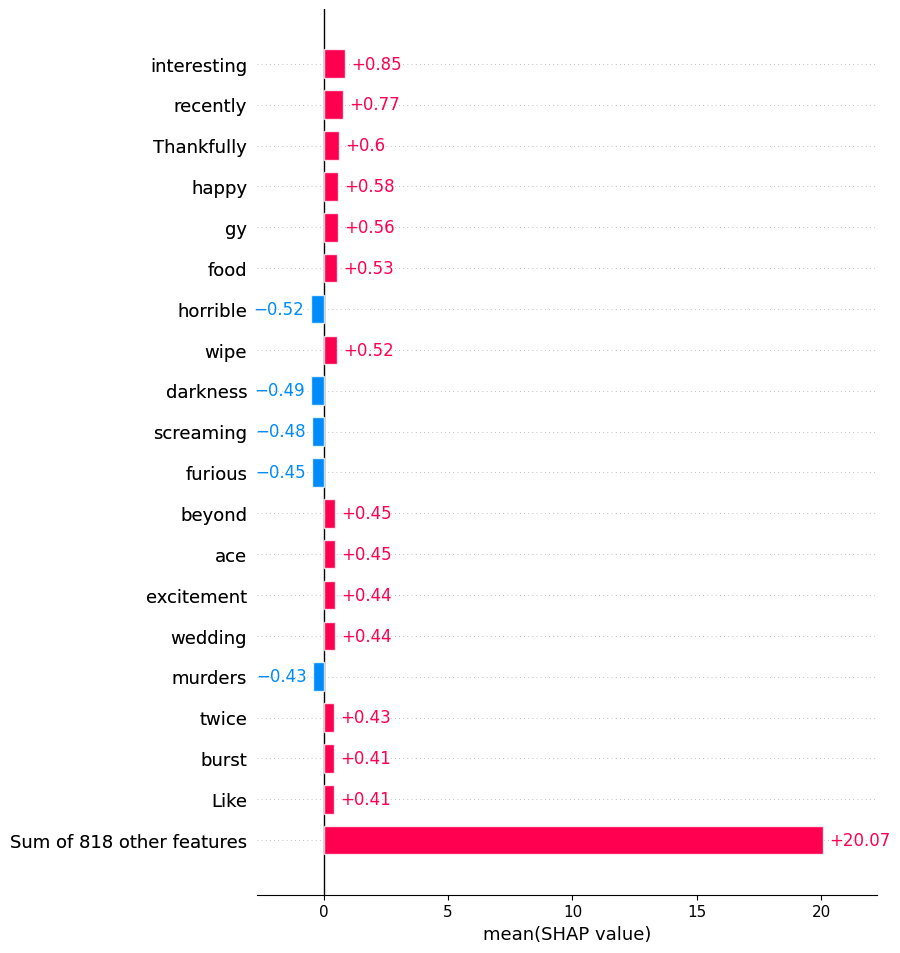

mean-test      Emotion: sadness      Occ: 35


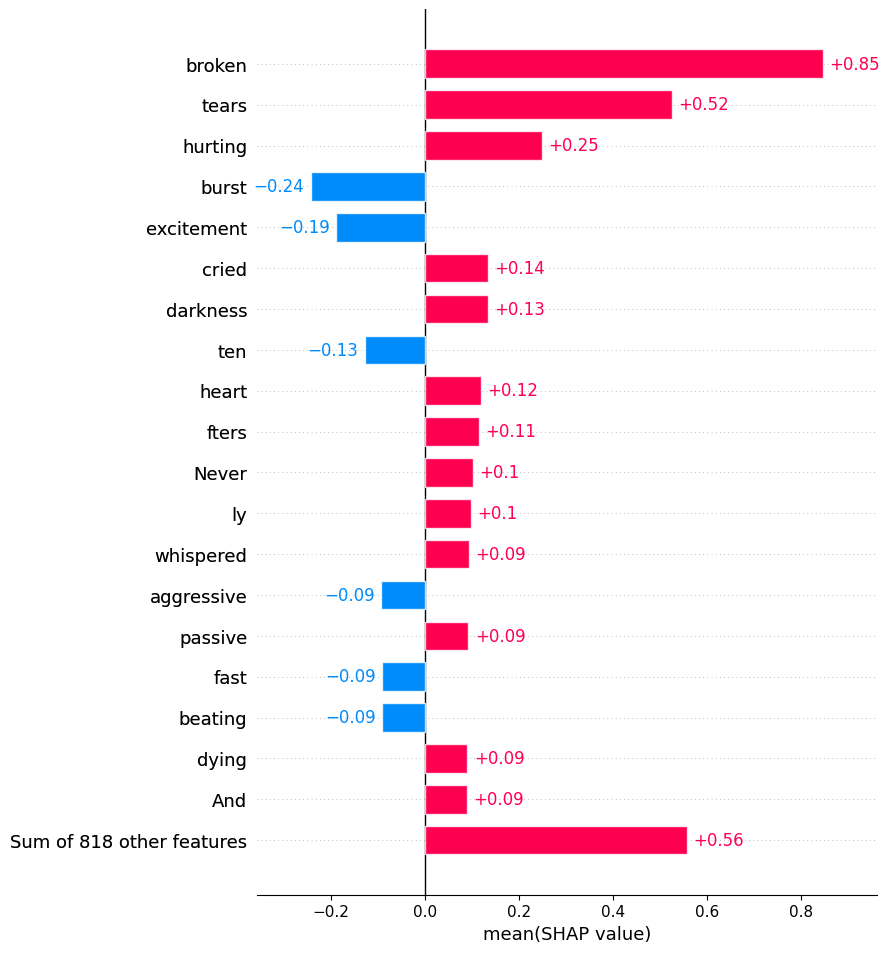

mean-test      Emotion: surprise      Occ: 31


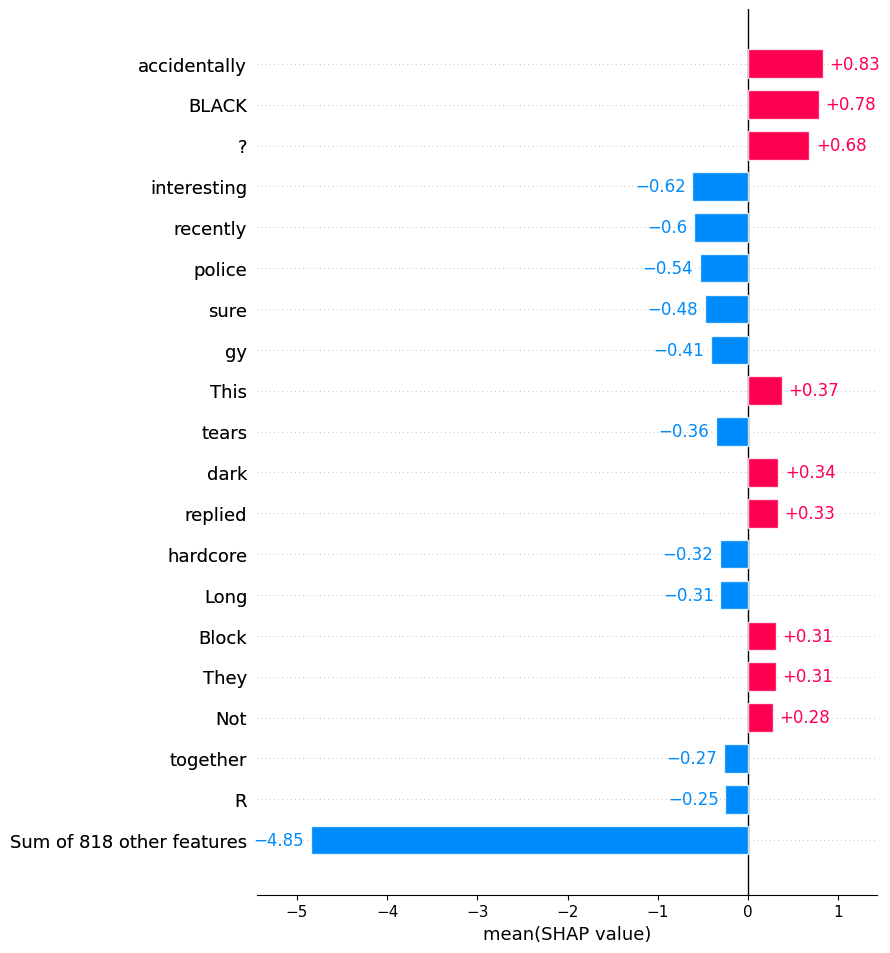

mean-test      Emotion: none      Occ: 13


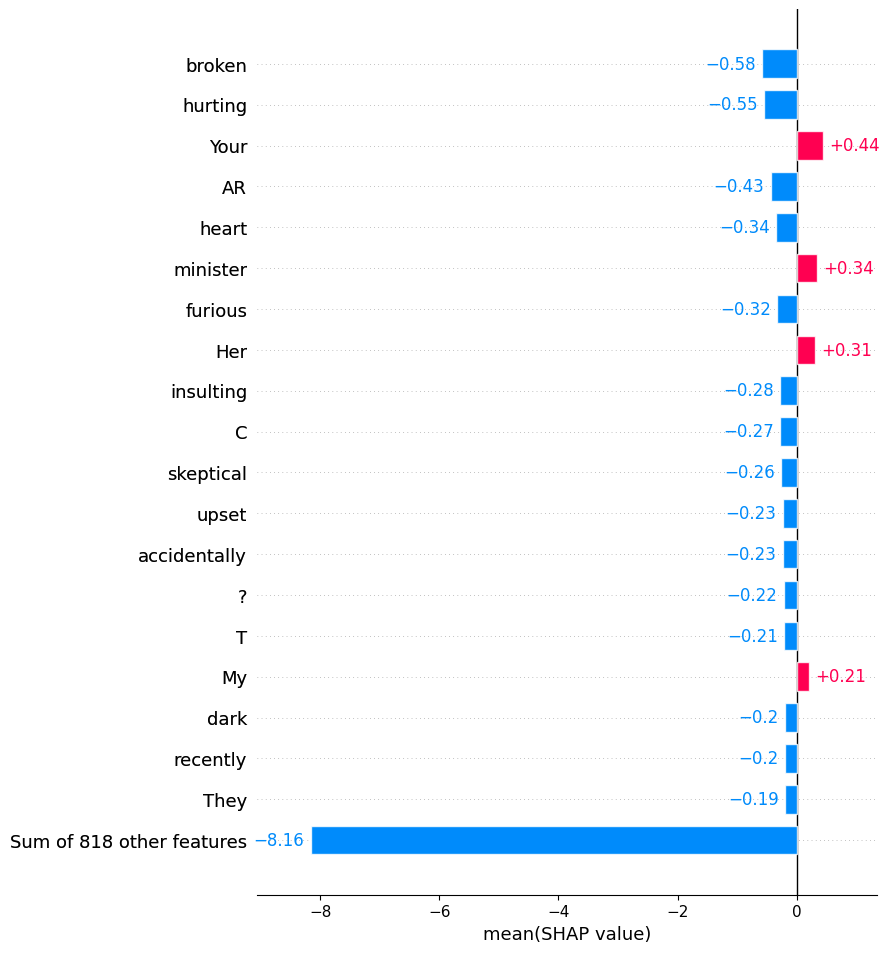

max-test      Emotion: anger      Occ: 16


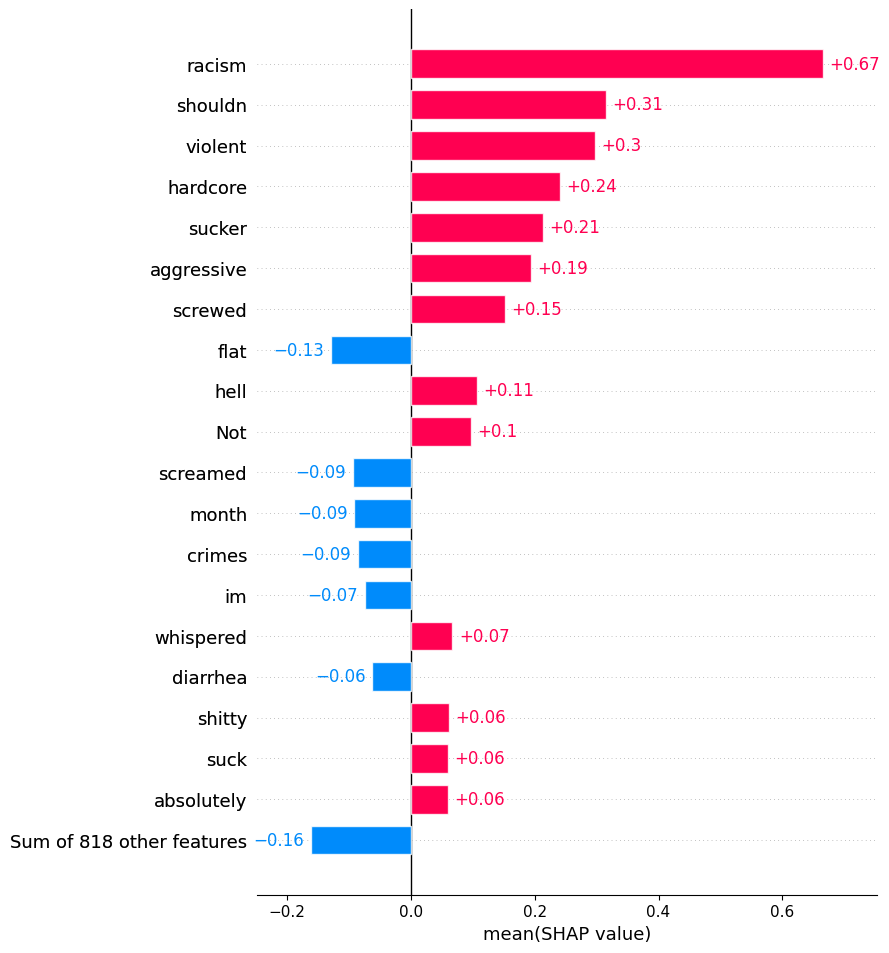

max-test      Emotion: fear      Occ: 63


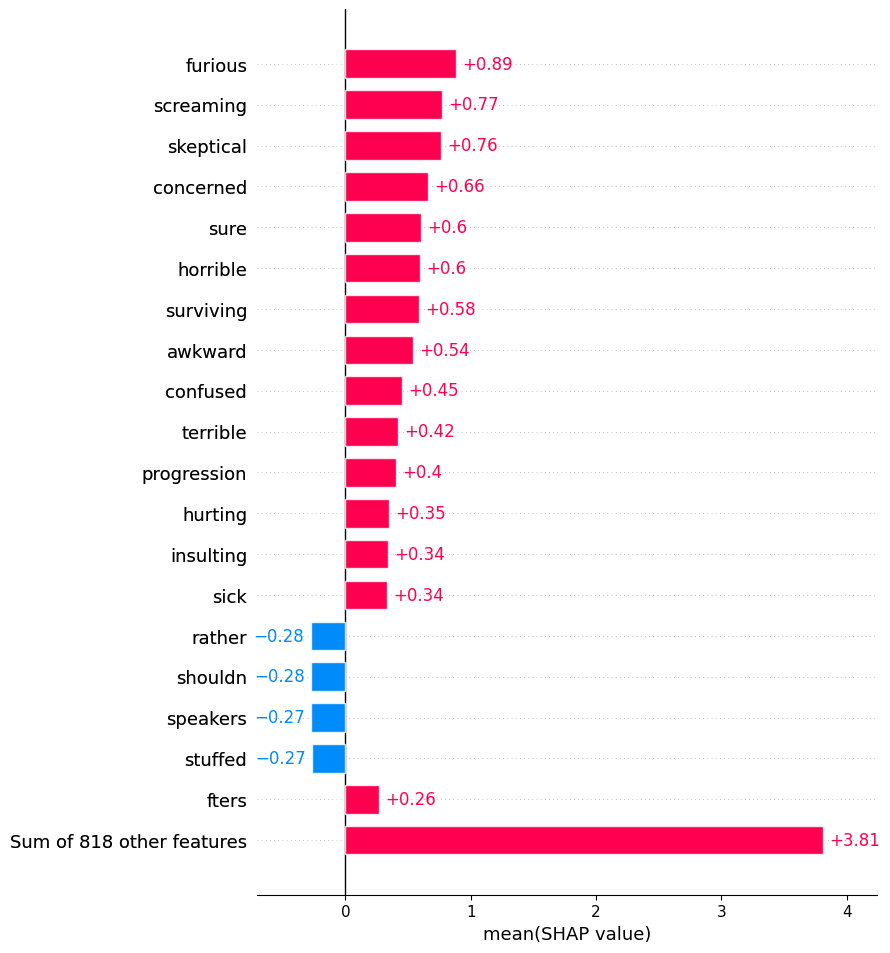

max-test      Emotion: joy      Occ: 31


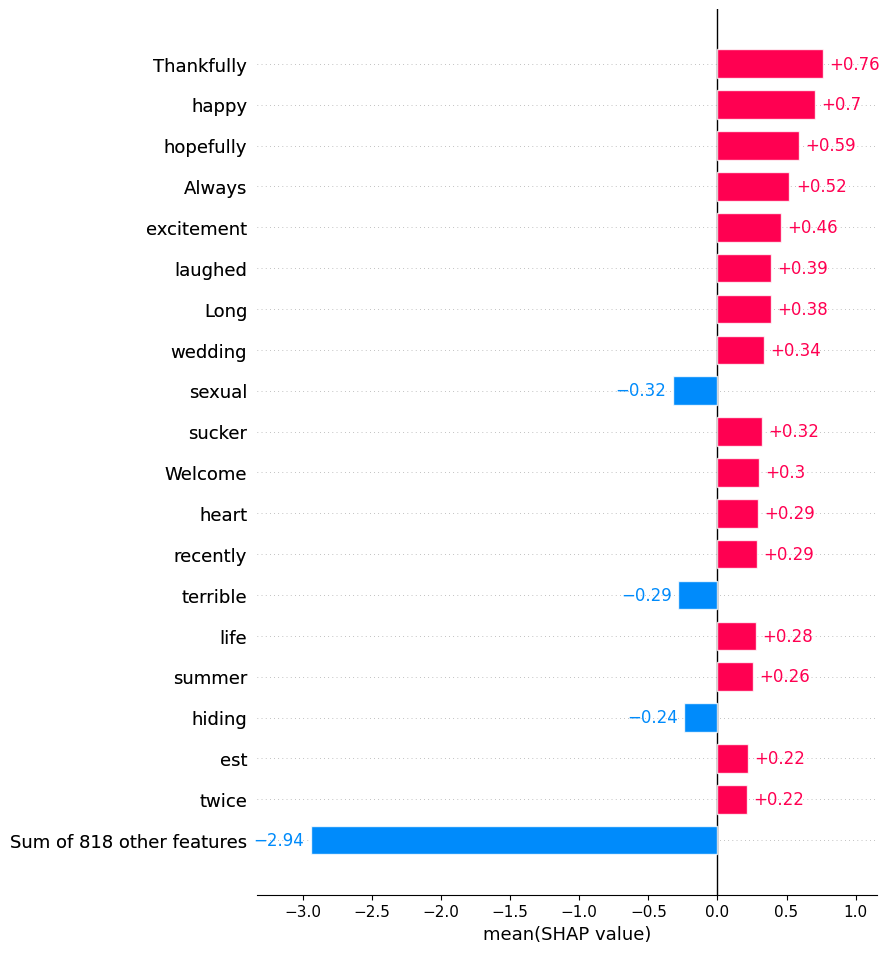

max-test      Emotion: sadness      Occ: 35


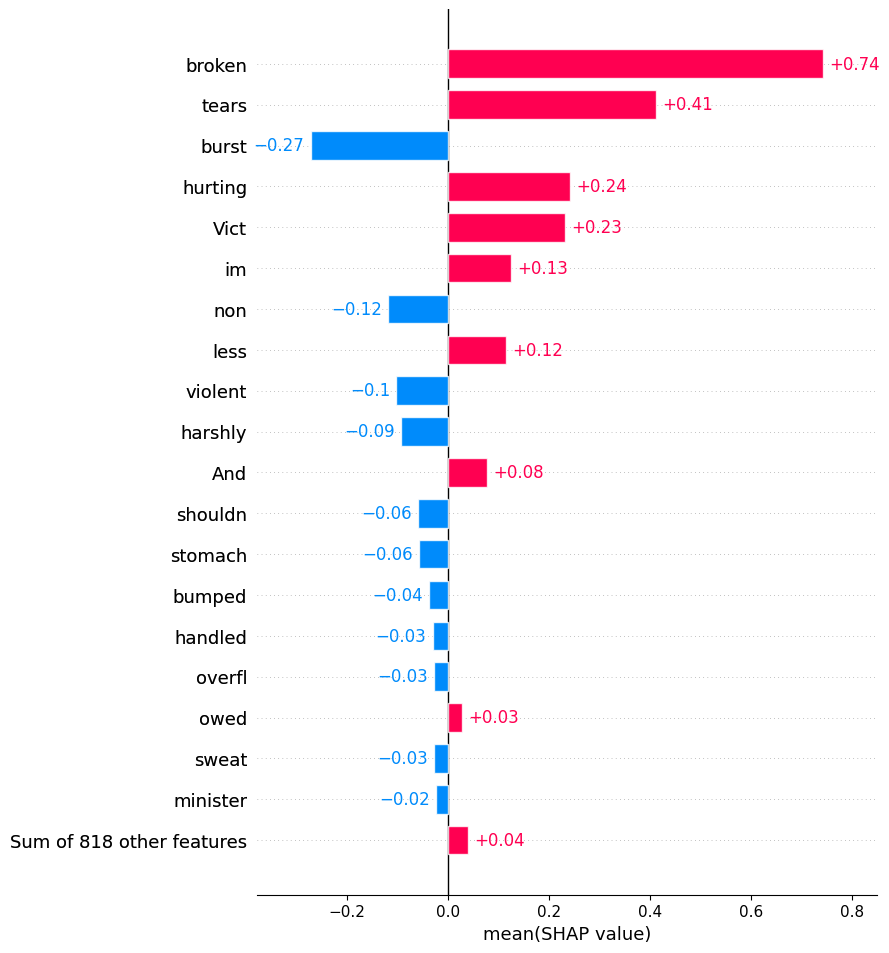

max-test      Emotion: surprise      Occ: 31


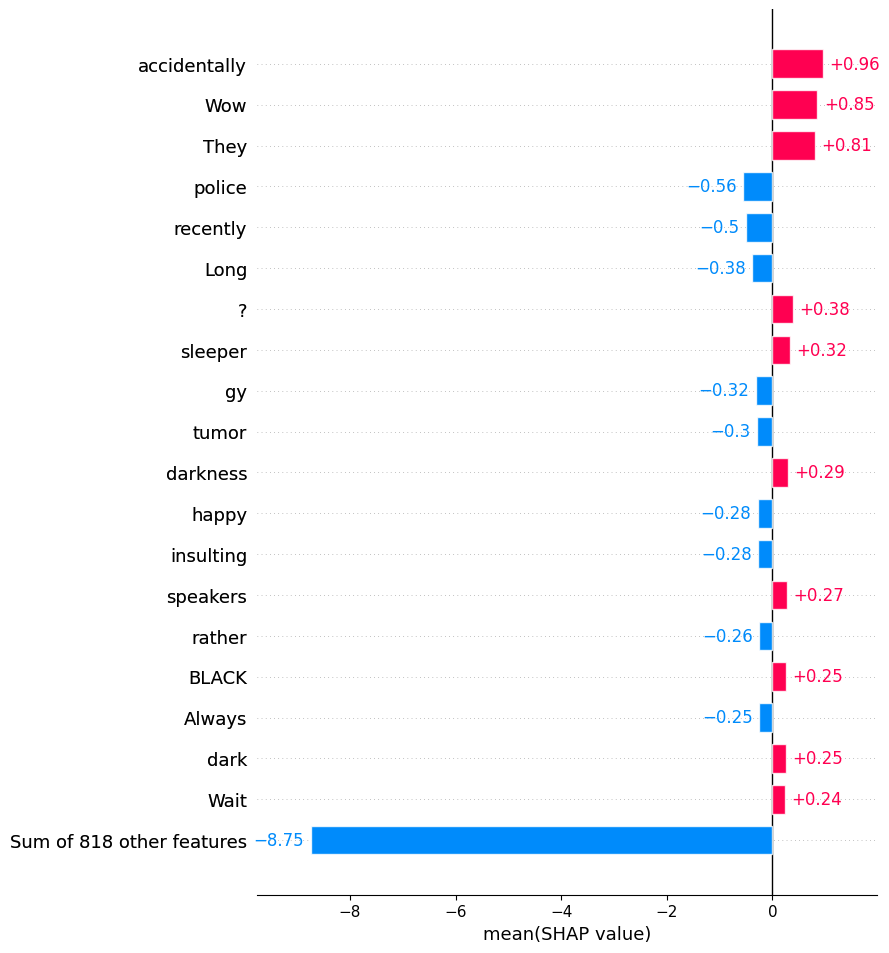

max-test      Emotion: none      Occ: 13


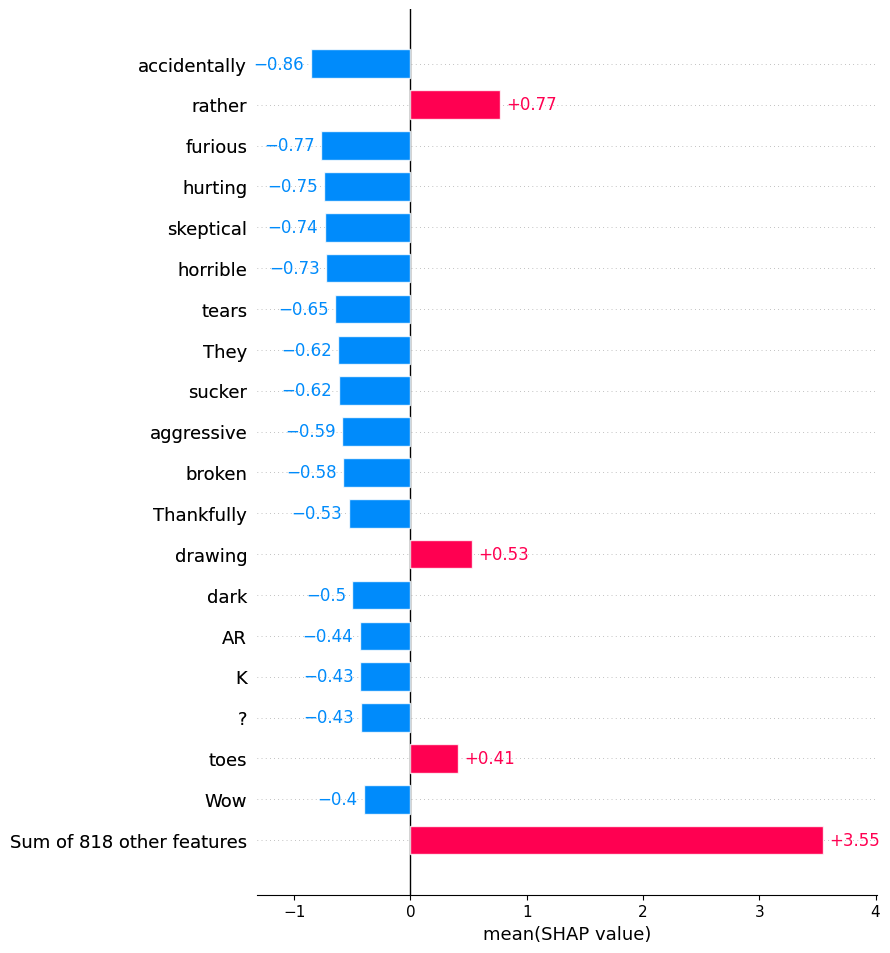

In [51]:
# Shap values mean on test data
run_shap_values_tuples = [(shap_values_mean, "mean", train_data), (shap_values_max, "max", train_data), (shap_values_mean_test, "mean-test", test117_data), (shap_values_max_test, "max-test", test117_data)]

for shap_values_mean, name, data in run_shap_values_tuples:
    emotion_accumulated = get_emotions_count_dict(data)
    for emotion in emotion_accumulated.keys():
        print(f"{name}      Emotion: {emotion}      Occ: {emotion_accumulated[emotion]}")
        shap.plots.bar(shap_values_mean[:, :, emotion].mean(0), max_display = 20) 

Emotion: joy      with 31


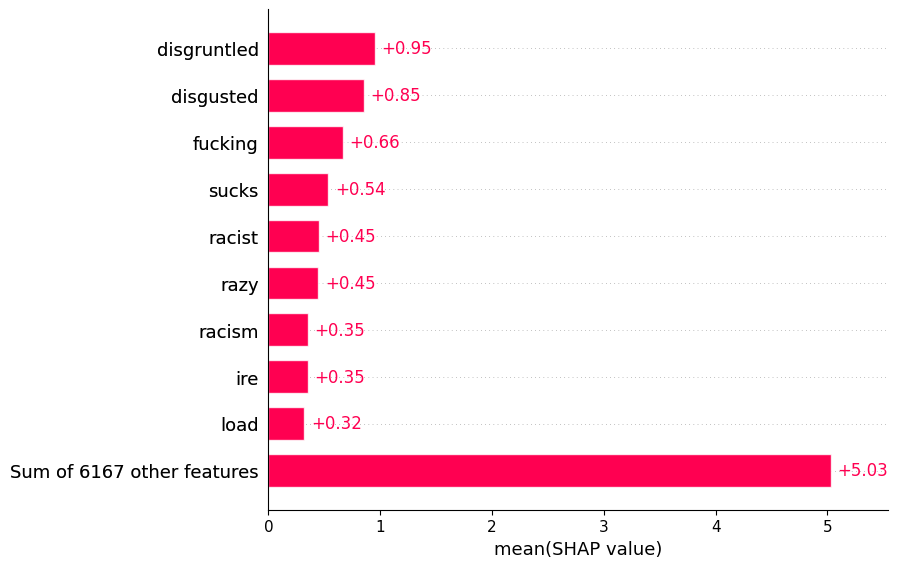

Emotion: sadness      with 35


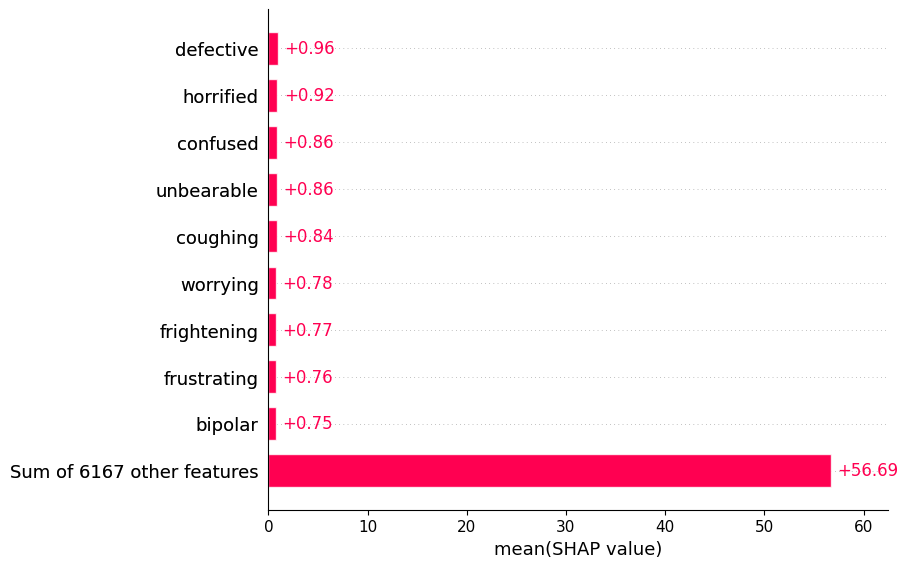

Emotion: fear      with 63


KeyboardInterrupt: 

In [19]:
# Shap values max
for emotion in emotion_accumulated.keys():
    if emotion == "none":
        continue
    print(f"Emotion: {emotion}      with {emotion_accumulated[emotion]}")
    shap.plots.bar(shap_values_max[:, :, emotion].mean(0)) 

In [20]:
# shap.plots.text(shap_values)
print("Mean")
shap.plots.text(shap_values_mean[867, :, "sadness"])
print("Max")
shap.plots.text(shap_values_max[867, :, "sadness"])
# shap.plots.bar(shap_values[:, :, "joy"].mean(0))    # abs values
# shap.plots.bar(shap_values[:, :, "joy"].mean(0), order=shap.Explanation.argsort.flip)


Mean


Max


Nice Examples:
187: so depressed
400+467= 867: tod gemocht 

In [ ]:
shap.plots.bar(shap_values_mean[:, :, "joy"].mean(0))

In [ ]:
mean_abs_shap_values = shap_values_mean.values.mean(axis=0)

# Get the feature names
feature_names = shap_values_mean.feature_names

# Ensure the shapes match
if len(mean_abs_shap_values) != len(feature_names):
    raise ValueError("Mismatch between SHAP values and feature names")

# Create a list of tuples (feature, mean_abs_shap_value) and sort it by mean_abs_shap_value
sorted_features = sorted(zip(feature_names, mean_abs_shap_values), key=lambda x: x[1], reverse=True)

# Extract the sorted feature names
sorted_feature_names = [feature for feature, value in sorted_features]

# Another list to compare
another_list = ['feature1', 'feature2', 'feature3']

# Compare the two lists
common_features = set(sorted_feature_names).intersection(another_list)
print("Common features:", common_features)

ValueError: operands could not be broadcast together with shapes (7,6) (48,6) 

In [22]:
shap_values_mean

.values =
array([array([[ 0.00000000e+00,  0.00000000e+00,  3.34076583e-04,
                0.00000000e+00, -3.35635990e-03, -8.66111368e-04],
              [ 0.00000000e+00,  0.00000000e+00, -8.60858709e-03,
                0.00000000e+00,  2.01749347e-01, -1.92201633e-01],
              [ 0.00000000e+00, -6.87208772e-03, -2.49256641e-02,
                0.00000000e+00,  1.34176201e-01, -3.71572534e-02],
              [ 0.00000000e+00,  6.87208772e-03,  1.93014853e-02,
                0.00000000e+00, -9.11374325e-02, -3.71572534e-02],
              [ 0.00000000e+00,  0.00000000e+00,  9.92833901e-01,
                0.00000000e+00, -6.47020845e-01, -1.18753238e-01],
              [ 0.00000000e+00,  0.00000000e+00, -1.79286301e-02,
                0.00000000e+00,  4.05589089e-01, -3.86135489e-01],
              [ 0.00000000e+00,  0.00000000e+00,  4.98932600e-03,
                0.00000000e+00,  0.00000000e+00,  2.15405226e-03]]),
       array([[ 0.00000000e+00, -3.90134286e-04,  1.31717